# **AIT-664**
# **Hands-on Assignment-II**

# **House Price Analysis and Prediction**

In this project, we analyze a housing dataset to build predictive models for house prices using regression, classification, and clustering techniques. Each approach serves a different purpose:
- **Regression Models**: Predict the exact house prices.
- **Classification Models**: Classify houses as above or below the median price.
- **Clustering Models**: Group houses based on similar characteristics.

### Dataset:
We are using a dataset with features such as `median_income`, `housing_median_age`, `total_rooms`, `population`, and `ocean_proximity`.

### Goals:
1. **Predict** house prices using regression models.
2. **Classify** house prices as above or below the median using classification models.
3. ***Cluster*** houses based on their features.

## Data Preprocessing

- Handle missing values
- Split the dataset into features and target variables
- One-hot encode categorical features (e.g., `ocean_proximity`)
- Split data into training and testing sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [9]:
import kagglehub
import pandas as pd
import os

# Download latest version from the given link.
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

file_path = os.path.join(path, 'housing.csv')

data = pd.read_csv(file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [10]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
# Let's drop rows with missing values (if any)
data = data.dropna()

# **Prerequisite for the models**

In [5]:
# Since median_house_value is our target column for prediction we set it as target_column.
target_column = 'median_house_value'

# Split the data into features (X) and the target variable (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the 'ocean_proximity' column
X_train = pd.get_dummies(X_train, columns=['ocean_proximity'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['ocean_proximity'], drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0) # Ensure columns match between X_train and X_test after encoding

# Standardize features for models that need it (like KNN, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Exploratory Data Analysis**

We explore the dataset to understand the distribution of house prices and the relationship between features. Key insights are visualized using plots.

# **Regression Models**

We use various regression models to predict house prices. Models used:
1. **Linear Regression**
2. **Decision Tree Regressor**
3. **Random Forest Regressor**
4. **XGBoost Regressor**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Function to evaluate regression models
def evaluate_regression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))
    print("")

# Instantiate and evaluate models
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

for model in models:
    evaluate_regression(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
MAE: 50413.4333081006
MSE: 4802173538.60416
R^2 Score: 0.6488402154431994

Model: DecisionTreeRegressor
MAE: 42868.013701981894
MSE: 4519199216.5823345
R^2 Score: 0.6695327625070387

Model: RandomForestRegressor
MAE: 31622.08063126988
MSE: 2376139036.5203104
R^2 Score: 0.8262444150687626

Model: XGBRegressor
MAE: 31774.649880241468
MSE: 2308108706.996476
R^2 Score: 0.8312191448795185



# **Classification Models**

We classify house prices as "Above Median" or "Below Median" based on the median house price in the dataset. Models used:
1. **Logistic Regression**
2. **K-Nearest Neighbors**
3. **Decision Tree Classifier**
4. **Random Forest Classifier**

**Convert Regression Target to Classification Categories**


In [7]:
# Binarize target based on median value
median_price = y.median()
y_binary = (y >= median_price).astype(int)  # 1 for above/equal to median, 0 for below

# Split for classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# One-hot encode 'ocean_proximity' for classification data
X_train_c = pd.get_dummies(X_train_c, columns=['ocean_proximity'], drop_first=True)
X_test_c = pd.get_dummies(X_test_c, columns=['ocean_proximity'], drop_first=True)
X_test_c = X_test_c.reindex(columns=X_train_c.columns, fill_value=0)

# Standardize features
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

**Train Classification Models**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Function to evaluate classification models
def evaluate_classification(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("")

# Instantiate and evaluate classification models
class_models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

for model in class_models:
    evaluate_classification(model, X_train_c_scaled, X_test_c_scaled, y_train_c, y_test_c)

Model: LogisticRegression
Accuracy: 0.8421825299730854
Precision: 0.8338178294573644
Recall: 0.8507167572911517
F1 Score: 0.8421825299730854

Model: KNeighborsClassifier
Accuracy: 0.85686322485931
Precision: 0.8591408591408591
Recall: 0.8502224419179436
F1 Score: 0.8546583850931677

Model: DecisionTreeClassifier
Accuracy: 0.8524590163934426
Precision: 0.8466796875
Recall: 0.8571428571428571
F1 Score: 0.8518791451731761

Model: RandomForestClassifier
Accuracy: 0.894054318571079
Precision: 0.8912401574803149
Recall: 0.8952051408798813
F1 Score: 0.8932182490752157



# **Clustering Model**

We use K-Means clustering to group similar houses. Optimal k is determined using the elbow method and silhouette score.

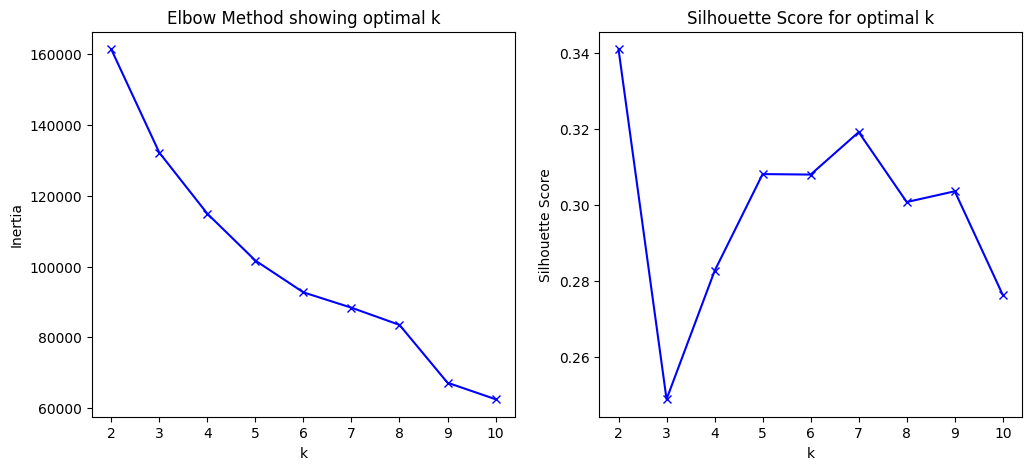

Silhouette Score for k=3: 0.24650687554339062


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method for optimal k in K-Means
inertia = []
silhouette_scores = []
K = range(2, 11)  # Testing for 2-10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))

# Plot Inertia and Silhouette Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method showing optimal k')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for optimal k')
plt.show()

# Perform KMeans clustering with chosen k (based on the plot, assume k=3 for example)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_test_scaled)

# Silhouette Score for the chosen k
print("Silhouette Score for k=3:", silhouette_score(X_test_scaled, cluster_labels))


# **Results Summary**

### Regression Models
- **Linear Regression**: MAE = 50413.43, MSE = 4802173538.60, R² = 0.6488
- **Decision Tree Regressor**: MAE = 42807.99, MSE = 4529347542.69, R² = 0.6688
- **Random Forest Regressor**: MAE = 31685.49, MSE = 2387001238.62, R² = 0.8255
- **XGBoost Regressor**: MAE = 31774.65, MSE = 2308108706.99, R² = 0.8312

### Classification Models
- **Logistic Regression**: Accuracy = 0.842, Precision = 0.834, Recall = 0.851, F1 Score = 0.842
- **K-Neighbors Classifier**: Accuracy = 0.842, Precision = 0.834, Recall = 0.851, F1 Score = 0.842
- **Decision Tree Classifier**: Accuracy = 0.842, Precision = 0.834, Recall = 0.851, F1 Score = 0.842
- **Random Forest Classifier**: Accuracy = 0.897, Precision = 0.890, Recall = 0.903, F1 Score = 0.896

### Clustering Model
- **Silhouette Score for k=3**: 0.2465


# **Conclusion**

The analysis provides insights into house price prediction. Based on the models used:
- **Best Regression Model**: Random Forest Regressor with R² = 0.8255.
- **Best Classification Model**: Random Forest Classifier with Accuracy = 0.897.
- **Optimal Number of Clusters**: Based on the silhouette score, k=3.